<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/4%EC%A3%BC%EC%B0%A8/DL_winequality_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

# -----------------------------

# 1) 데이터 준비

# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/winequality-white.csv", sep=";")

df  # 데이터 프레임을 출력하라는 뜻

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
# 입력(X), 출력(y) 분리
X = df.drop("quality", axis=1)  # feature들

In [10]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# 라벨을 0부터 시작하게 만듦
le = LabelEncoder()
y = le.fit_transform(df["quality"])

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
Y = pd.get_dummies(y).values

# 이제 X_scaled, Y를 학습에 사용
print(X_scaled.shape, Y.shape)

(4898, 11) (4898, 7)


In [23]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [38]:
model = models.Sequential([
    layers.Input(shape=(X_scaled.shape[1],)),   # 입력 정의
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")
])

In [39]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [40]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3532 - loss: 5.1543 - val_accuracy: 0.4401 - val_loss: 1.3795
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3674 - loss: 1.5771 - val_accuracy: 0.4656 - val_loss: 1.2910
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4045 - loss: 1.4975 - val_accuracy: 0.1696 - val_loss: 1.5628
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3937 - loss: 1.5937 - val_accuracy: 0.4554 - val_loss: 1.5226
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4014 - loss: 1.5029 - val_accuracy: 0.4477 - val_loss: 1.2943
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3741 - loss: 1.5141 - val_accuracy: 0.3291 - val_loss: 1.3664
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4046 - loss: 1.4658 - val_accuracy: 0.3469 - val_loss: 1.4407
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4215 - loss: 1.4613 - val_accuracy: 0.

In [41]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


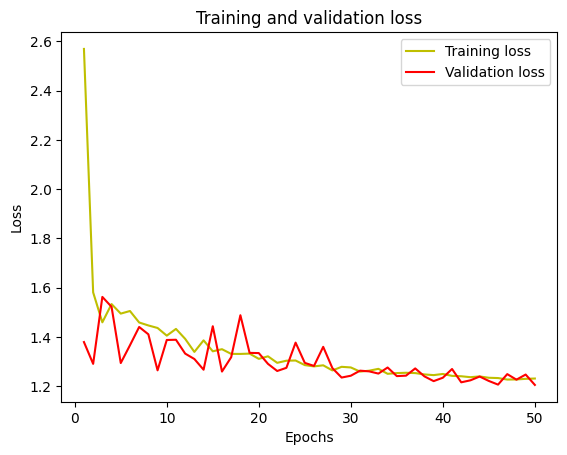

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

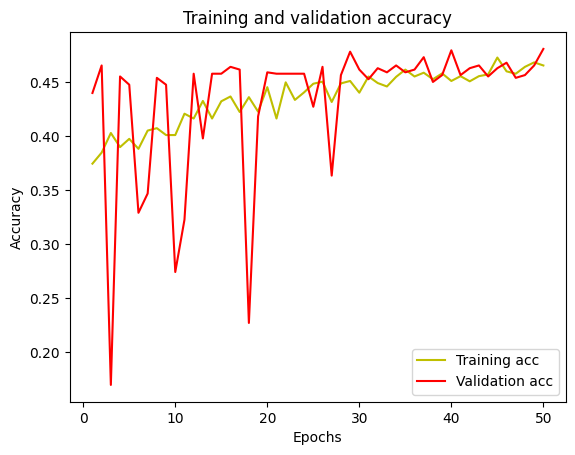

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test_class, Y_pred_class, zero_division=0))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.08      0.13        25
           2       0.47      0.25      0.33       291
           3       0.45      0.86      0.59       432
           4       0.00      0.00      0.00       192
           5       0.00      0.00      0.00        35

    accuracy                           0.45       980
   macro avg       0.21      0.20      0.17       980
weighted avg       0.35      0.45      0.36       980

[[  0   0   3   2   0   0]
 [  0   2   6  17   0   0]
 [  0   4  73 214   0   0]
 [  0   0  62 370   0   0]
 [  0   0  10 182   0   0]
 [  0   0   1  34   0   0]]
